In [1]:
#import some stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import collections
import glob
from scipy.stats import pearsonr
import scipy.optimize
import scipy.stats

In [2]:
#get the data
results = pd.DataFrame(pd.read_csv('../../Isogenic_Kd/20220621_isogenic_revertant_comp.csv',delimiter=','))
results['KD_stdev']=results['KD_err']*np.sqrt(2)
results

,shortname,isogenic_rep1,isogenic_rep2,KD,KD_err,KD_stdev
0,reverted_MA90,10.01,10.11,10.060,0.050,0.070711
1,somatic_MA90,9.96,10.10,10.030,0.070,0.098995
2,reverted_SI06,9.21,9.42,9.315,0.105,0.148492
3,somatic_SI06,9.18,9.45,9.315,0.135,0.190919


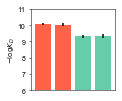

In [3]:
#make a plot
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.figure(figsize=(1.5,1.5))

plt.bar(x=results['shortname'],height=results['KD'],yerr=results['KD_err'],color=['tomato','tomato','mediumaquamarine','mediumaquamarine'])
plt.ylim(6,11)
plt.xticks(ticks=[],labels=[])
plt.yticks(ticks=[6,7,8,9,10,11],labels=['6','7','8','9','10','11'],fontsize=7)
plt.xlabel('',fontsize=7,labelpad=2)
plt.ylabel('$-\log K_D$',fontsize=7,labelpad=0)
plt.tick_params(length=2.5,width=0.5)
plt.savefig('images/revertant_comp.png',transparent=True, dpi=1200,bbox_inches='tight')

In [49]:
#do a t-test
from scipy.stats import ttest_ind_from_stats
somatic16 = (10.060,9.315)
somatic16err = (0.070711,0.148492)
somatic18 = (10.030,9.315)
somatic18err = (0.148492,0.190919)
for i in range(2):
    print(ttest_ind_from_stats(mean1=somatic16[i], std1=somatic16err[i], nobs1=2, mean2=somatic18[i], std2=somatic18err[i], nobs2=2))



Ttest_indResult(statistic=0.2579605316718615, pvalue=0.8205551604928836)
Ttest_indResult(statistic=0.0, pvalue=1.0)
